In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for modelling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV

import warnings

In [6]:
from catboost import CatBoostRegressor # catboost not compatible with numpy 2.x may result in value error,try numpy==1.26

In [7]:
# import catboost
from xgboost import XGBRegressor

In [8]:
df=pd.read_csv("E:\Data Science\ML Project1\\Notebook\data\StudentsPerformance.csv")


In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


we will try to predict maths score based on other all features, taking other all features as independent features

In [10]:
X=df.drop(columns=['math score'],axis=1)

In [11]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [12]:
y=df['math score']

In [13]:
#creating columns transformers with three types of transformers

num_features=X.select_dtypes(exclude='object').columns  # only numerical features by excluding object dtypes
cat_features=X.select_dtypes(include='object').columns  # only categorical features by including object dtypes

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()


#transforms columns as mentioned
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)



In [14]:
X=preprocessor.fit_transform(X)

In [15]:
X.shape

(1000, 19)

In [16]:
#seperate datset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,X_test.shape

((800, 19), (200, 19))

creating an evaluation function to give all mterics after training of model

In [17]:
def eval_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)  #shows how well the data fit the regression model
    return mae,mse,rmse,r2_square

In [18]:
# defining all the models

models={
    'Linear Regression': LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K-Neighbors Regressor':KNeighborsRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'Catboosting Regressor':CatBoostRegressor(),
    'AdaBoost Regressor':AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)  #training the model
    
    #making prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #evaluation
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2=eval_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2=eval_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('MODEL PERFORMANCE FOR TRAINING SET')
    print('- rmse: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- MSE: {:.4f}'.format(model_train_mse))
    print('- R2 Score: {:.4f}'.format(model_train_r2))

    print('+++++++++++++++++++++++++++++++++++++++++++++++')

    print('MODEL PERFORMANCE FOR TEST SET')
    print('- rmse: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- MSE: {:.4f}'.format(model_test_mse))
    print('- R2 Score: {:.4f}'.format(model_test_r2))    
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")



Linear Regression
MODEL PERFORMANCE FOR TRAINING SET
- rmse: 5.3293
- Mean Absolute Error: 4.2715
- MSE: 28.4013
- R2 Score: 0.8740
+++++++++++++++++++++++++++++++++++++++++++++++
MODEL PERFORMANCE FOR TEST SET
- rmse: 5.3293
- Mean Absolute Error: 4.2222
- MSE: 29.4326
- R2 Score: 0.8790


Lasso
MODEL PERFORMANCE FOR TRAINING SET
- rmse: 6.5938
- Mean Absolute Error: 5.2063
- MSE: 43.4784
- R2 Score: 0.8071
+++++++++++++++++++++++++++++++++++++++++++++++
MODEL PERFORMANCE FOR TEST SET
- rmse: 6.5938
- Mean Absolute Error: 5.1579
- MSE: 42.5064
- R2 Score: 0.8253


Ridge
MODEL PERFORMANCE FOR TRAINING SET
- rmse: 5.3233
- Mean Absolute Error: 4.2650
- MSE: 28.3378
- R2 Score: 0.8743
+++++++++++++++++++++++++++++++++++++++++++++++
MODEL PERFORMANCE FOR TEST SET
- rmse: 5.3233
- Mean Absolute Error: 4.2111
- MSE: 29.0563
- R2 Score: 0.8806


K-Neighbors Regressor
MODEL PERFORMANCE FOR TRAINING SET
- rmse: 5.7079
- Mean Absolute Error: 4.5168
- MSE: 32.5799
- R2 Score: 0.8555
++++++++++++

In [21]:
result=pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

In [23]:
result

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879046
5,Random Forest Regressor,0.852147
8,AdaBoost Regressor,0.851780
7,Catboosting Regressor,0.851632
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.727848


Linear regression

In [25]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100

print("Accuracy of model is %.2f"%score)

Accuracy of model is 87.90


plotting y_pred and y_test

Text(0, 0.5, 'Predicted Values')

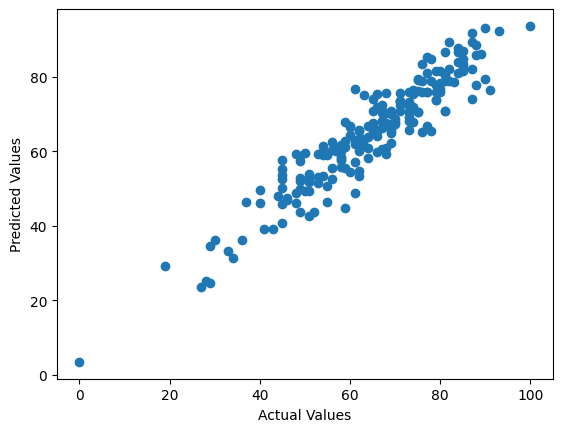

In [26]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

<Axes: xlabel='math score'>

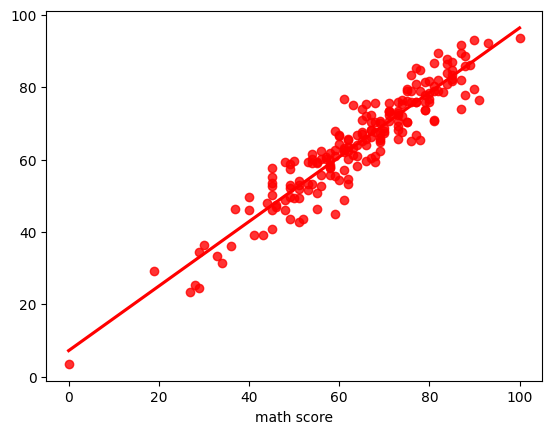

In [27]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='r')


finding diff bw actual and predicted values

In [28]:
pred_df=pd.DataFrame({'Actual Values':y_test,'Predicted values':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Values,Predicted values,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
